In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import shapiro
from random import sample

In [118]:
data=pd.read_csv('F:/IMP.DATA/Documents/FlippNation/r/Data (1)/Data/bank-full.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [127]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [114]:
data.y.replace(('yes','no'),(1,0),inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [3]:
data.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [8]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [30]:
data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [46]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [47]:
data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [48]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [49]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [75]:
data.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [81]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [86]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [89]:
data.day.nunique()

31

In [90]:
data.duration.value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [91]:
data.duration.nunique()

1573

In [121]:
data.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [123]:
data.campaign.nunique()

48

In [126]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [128]:
data.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [134]:
data10=data.groupby('job')
data10.first()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,41,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
blue-collar,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
entrepreneur,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
housemaid,53,divorced,primary,no,947,yes,no,unknown,5,may,163,1,-1,0,unknown,no
management,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
retired,58,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
self-employed,58,married,tertiary,no,-364,yes,no,unknown,5,may,355,1,-1,0,unknown,no
services,57,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
student,26,single,secondary,no,0,yes,no,unknown,5,may,610,2,-1,0,unknown,no


In [135]:
data10.get_group('admin.')

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10,41,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,29,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
16,45,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
25,44,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
32,60,married,secondary,no,39,yes,yes,unknown,5,may,208,1,-1,0,unknown,no
38,36,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,no
39,37,single,secondary,no,0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
45,36,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
53,42,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
60,32,married,tertiary,no,0,yes,no,unknown,5,may,138,1,-1,0,unknown,no


In [139]:
data11=data.groupby(['job','balance'])
data11.describe()

age                                                   day  \
                count  mean       std   min    25%   50%    75%   max count   
job     balance                                                               
admin.  -1601     1.0  53.0       NaN  53.0  53.00  53.0  53.00  53.0   1.0   
        -1415     1.0  50.0       NaN  50.0  50.00  50.0  50.00  50.0   1.0   
        -1386     1.0  42.0       NaN  42.0  42.00  42.0  42.00  42.0   1.0   
        -1300     1.0  42.0       NaN  42.0  42.00  42.0  42.00  42.0   1.0   
        -1272     1.0  32.0       NaN  32.0  32.00  32.0  32.00  32.0   1.0   
        -1249     1.0  44.0       NaN  44.0  44.00  44.0  44.00  44.0   1.0   
        -1196     1.0  58.0       NaN  58.0  58.00  58.0  58.00  58.0   1.0   
        -1193     1.0  49.0       NaN  49.0  49.00  49.0  49.00  49.0   1.0   
        -1137     2.0  50.5  0.707107  50.0  50.25  50.5  50.75  51.0   2.0   
        -1092     1.0  46.0       NaN  46.0  46.00  46.0  46.00  46.0   1.0   
        -1091     1.0  47.0       NaN  47.0  47.00  47.0  47.00  47.0   1.0   
        -1089     1.0  54.0       NaN  54.0  54.00  54.0  54.00  54.0   1.0   
        -1049     1.0  30.0       NaN  30.0  30.00  30.0  30.00  30.0   1.0   
        -1011     1.0  33.0       NaN  33.0  33.00  33.0  33.00  33.0   1.0   
        -982      1.0  39.0       NaN  39.0  39.00  39.0  39.00  39.0   1.0   
        -976      1.0  46.0       NaN  46.0  46.00  46.0  46.00  46.0   1.0   
        -967      1.0  57.0       NaN  57.0  57.00  57.0  57.00  57.0   1.0   
        -962      1.0  49.0       NaN  49.0  49.00  49.0  49.00  49.0   1.0   
        -938      1.0  30.0       NaN  30.0  30.00  30.0  30.00  30.0   1.0   
        -930      1.0  26.0       NaN  26.0  26.00  26.0  26.00  26.0   1.0   
        -898      2.0  37.5  0.707107  37.0  37.25  37.5  37.75  38.0   2.0   
        -895      1.0  51.0       NaN  51.0  51.00  51.0  51.00  51.0   1.0   
        -879      1.0  43.0       NaN  43.0  43.00  43.0  43.00  43.0   1.0   
        -874      2.0  47.5  0.707107  47.0  47.25  47.5  47.75  48.0   2.0   
        -847      1.0  42.0       NaN  42.0  42.00  42.0  42.00  42.0   1.0   
        -811      1.0  36.0       NaN  36.0  36.00  36.0  36.00  36.0   1.0   
        -797      1.0  59.0       NaN  59.0  59.00  59.0  59.00  59.0   1.0   
        -790      1.0  27.0       NaN  27.0  27.00  27.0  27.00  27.0   1.0   
        -779      1.0  50.0       NaN  50.0  50.00  50.0  50.00  50.0   1.0   
        -769      1.0  40.0       NaN  40.0  40.00  40.0  40.00  40.0   1.0   
...               ...   ...       ...   ...    ...   ...    ...   ...   ...   
unknown  4150     1.0  58.0       NaN  58.0  58.00  58.0  58.00  58.0   1.0   
         4244     1.0  57.0       NaN  57.0  57.00  57.0  57.00  57.0   1.0   
         4413     1.0  45.0       NaN  45.0  45.00  45.0  45.00  45.0   1.0   
         4465     1.0  28.0       NaN  28.0  28.00  28.0  28.00  28.0   1.0   
         4535     1.0  34.0       NaN  34.0  34.00  34.0  34.00  34.0   1.0   
         4717     1.0  65.0       NaN  65.0  65.00  65.0  65.00  65.0   1.0   
         4722     1.0  60.0       NaN  60.0  60.00  60.0  60.00  60.0   1.0   
         4846     1.0  49.0       NaN  49.0  49.00  49.0  49.00  49.0   1.0   
         5003     1.0  60.0       NaN  60.0  60.00  60.0  60.00  60.0   1.0   
         5361     1.0  52.0       NaN  52.0  52.00  52.0  52.00  52.0   1.0   
         5521     1.0  52.0       NaN  52.0  52.00  52.0  52.00  52.0   1.0   
         5700     1.0  37.0       NaN  37.0  37.00  37.0  37.00  37.0   1.0   
         5837     1.0  46.0       NaN  46.0  46.00  46.0  46.00  46.0   1.0   
         6421     2.0  27.0  0.000000  27.0  27.00  27.0  27.00  27.0   2.0   
         6836     1.0  30.0       NaN  30.0  30.00  30.0  30.00  30.0   1.0   
         6929     1.0  30.0       NaN  30.0  30.00  30.0  30.00  30.0   1.0   
         6999     1.0  39.0       NaN  39.0  39.00  39.0  39.00  39.

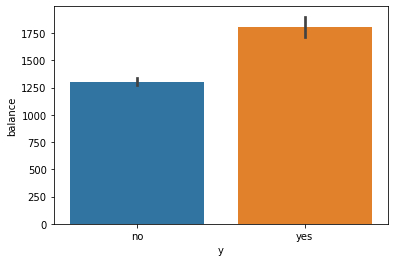

In [23]:
sns.barplot(x=data.y,y=data.balance)

In [ ]:
data.day.value_counts()

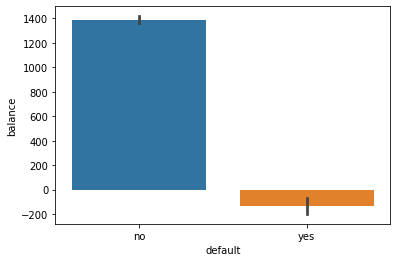

In [42]:
sns.barplot(data.default,data.balance)

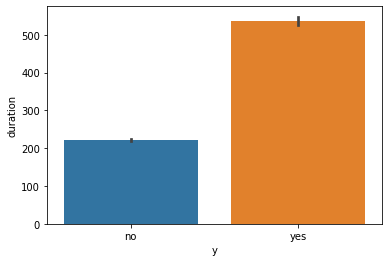

In [44]:
sns.barplot(x=data.y,y=data.duration)

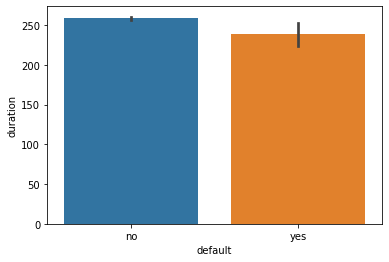

In [45]:
sns.barplot(x=data.default,y=data.duration)

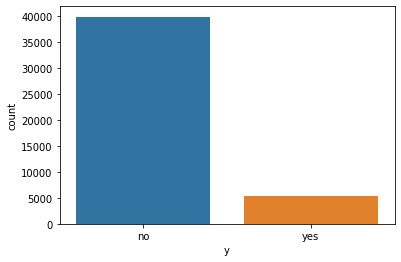

In [26]:
sns.countplot(data.y)

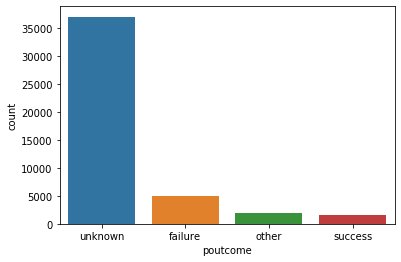

In [27]:
sns.countplot(data.poutcome)

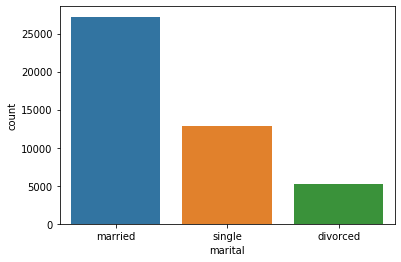

In [29]:
sns.countplot(data.marital)

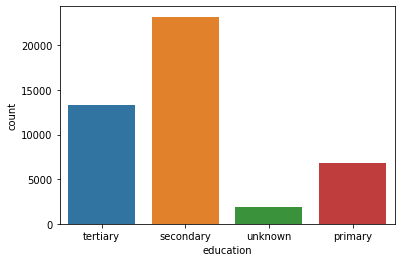

In [31]:
sns.countplot(data.education)

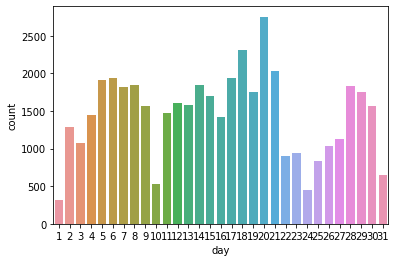

In [79]:
sns.countplot(data.day)

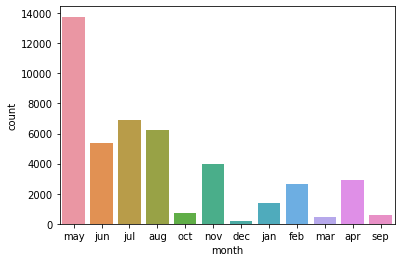

In [80]:
sns.countplot(data.month)

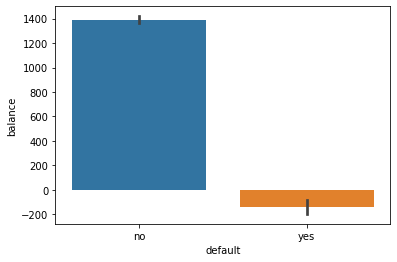

In [41]:
sns.barplot(data.default,data.balance)

In [36]:
pd.crosstab(data.job,data.y)

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [74]:
pd.crosstab(data.contact,data.y)

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [93]:
pd.crosstab(data.day,data.y)

y,no,yes
day,,
1,232,90
2,1111,182
3,901,178
4,1215,230
5,1695,215
6,1751,181
7,1660,157
8,1641,201
9,1382,179


In [94]:
pd.crosstab(data.month,data.y)

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


In [124]:
pd.crosstab(data.campaign,data.y)

y,no,yes
campaign,,
1,14983,2561
2,11104,1401
3,4903,618
4,3205,317
5,1625,139
6,1199,92
7,688,47
8,508,32
9,306,21


In [125]:
pd.crosstab(data.y,data.campaign)

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
y,,,,,,,,,,,,,,,,,,,,,
no,14983,11104,4903,3205,1625,1199,688,508,306,252,...,1,2,3,1,1,2,1,1,1,1
yes,2561,1401,618,317,139,92,47,32,21,14,...,0,0,0,0,0,0,0,0,0,0


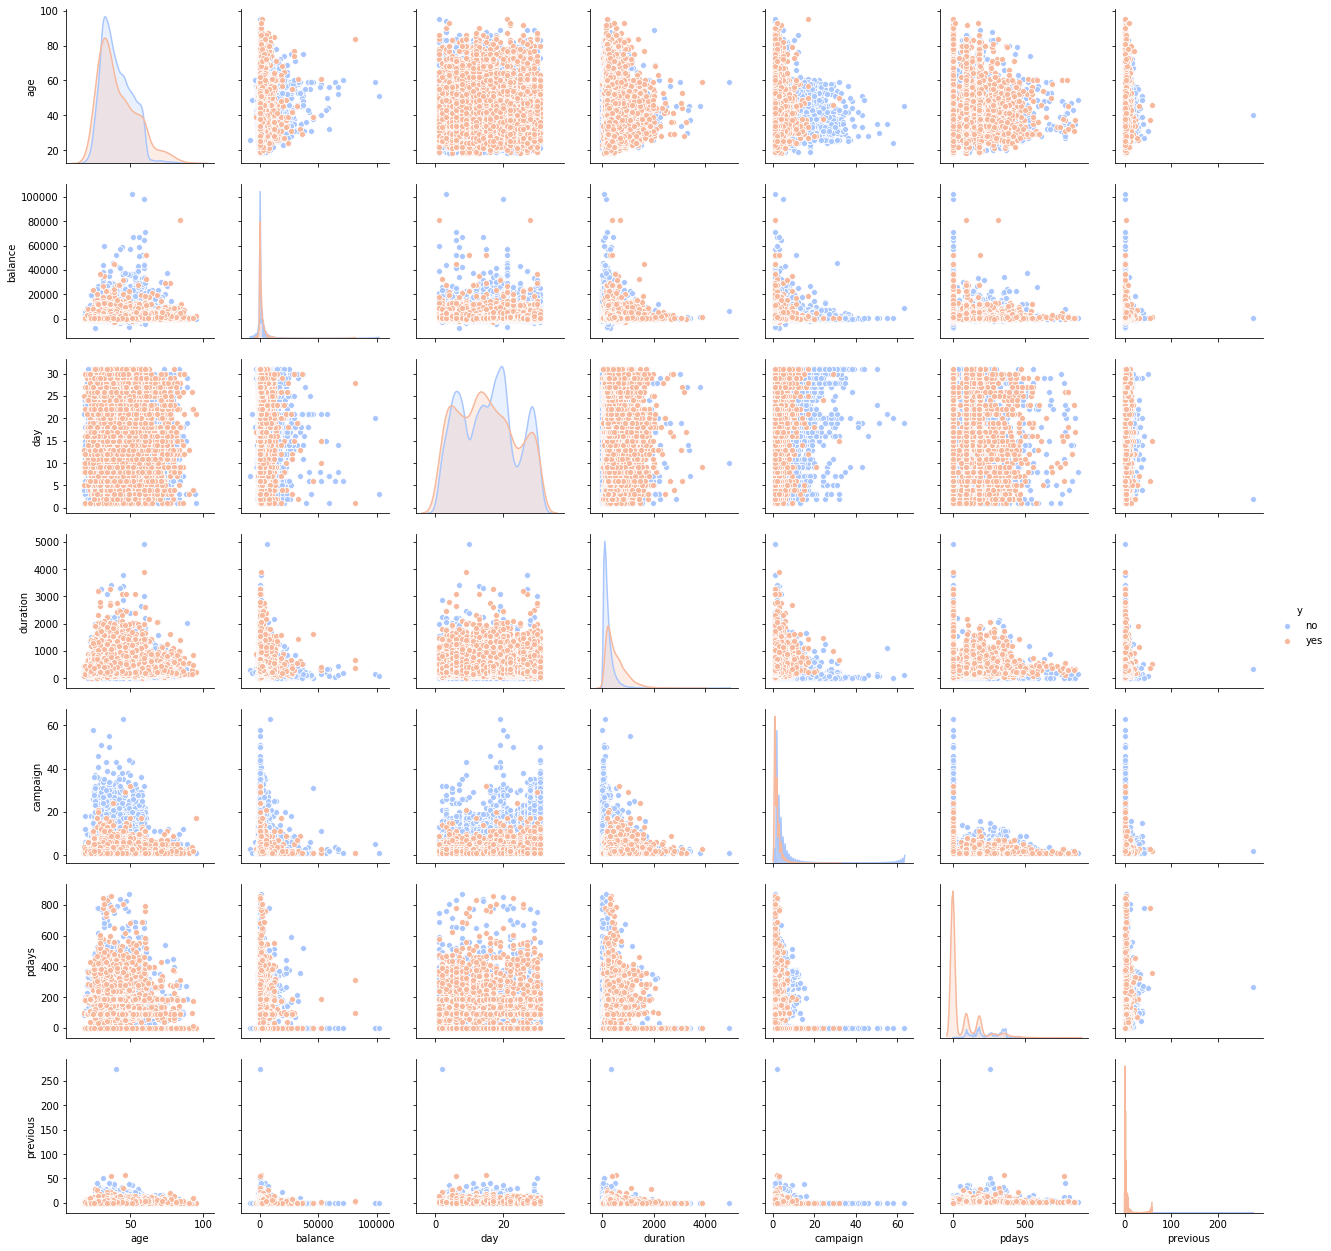

In [7]:
sns.pairplot(data,hue='y',palette='coolwarm')

In [110]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

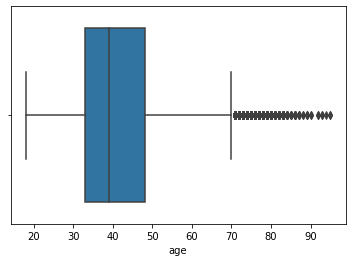

In [20]:
sns.boxplot(x=data['age'])

In [32]:
data.age.median()


39.0

In [30]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
IQR


48.0

In [48]:
#Cannot use Correlation for Categorical Label
correlation,pvalue=pearsonr(data['age'],data['y'])
print(correlation)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [100]:
from scipy.stats import pearsonr
correlation,pvalue = pearsonr(data.duration , data.age)
print(correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - R&DSpend and Profit has linear relationship")
else:
    print("Null Hypothesis (H0)- R&D Spend and Profit has no linear relationship")

-0.004648428470616238
0.3229725968449729
Confidence Level : 67.70274031550271 %
Null Hypothesis (H0)- R&D Spend and Profit has no linear relationship


In [101]:
from scipy.stats import pearsonr
correlation,pvalue = pearsonr(data.duration , data.age)
print(correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - R&DSpend and Profit has linear relationship")
else:
    print("Null Hypothesis (H0)- R&D Spend and Profit has no linear relationship")

-0.004648428470616238
0.3229725968449729
Confidence Level : 67.70274031550271 %
Null Hypothesis (H0)- R&D Spend and Profit has no linear relationship


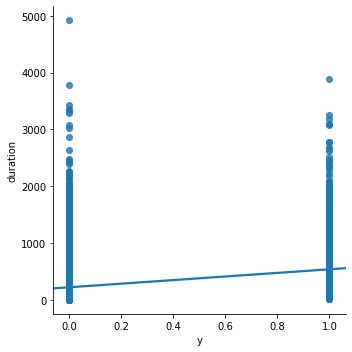

In [117]:
sns.lmplot(x='y',y='duration',data=data)

In [65]:
contigency_table = pd.crosstab(data.job,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

3.337121944935502e-172
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [66]:
contigency_table = pd.crosstab(data.balance,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

2.707929121896353e-97
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [67]:
contigency_table = pd.crosstab(data.marital,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

2.1450999986791792e-43
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [69]:
contigency_table = pd.crosstab(data.education,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

1.6266562124072994e-51
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [70]:
contigency_table = pd.crosstab(data.default,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

2.4538606753508344e-06
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 99.99975461393247 %


In [71]:
contigency_table = pd.crosstab(data.loan,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

1.665061163492756e-47
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [72]:
contigency_table = pd.crosstab(data.housing,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

2.918797605076633e-192
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [73]:
contigency_table = pd.crosstab(data.contact,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

1.251738325340638e-225
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [92]:
contigency_table = pd.crosstab(data.day,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

6.896005055098654e-102
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [95]:
contigency_table = pd.crosstab(data.month,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [98]:
contigency_table = pd.crosstab(data.duration,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [119]:
contigency_table = pd.crosstab(data.campaign,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

9.896132606234023e-50
Alternate Hypothesis (H1): State and Profit have some form of relationship.
Confidence Level : 100.0 %


In [ ]:
contigency_table = pd.crosstab(data.duration,data.y)

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
print(p)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

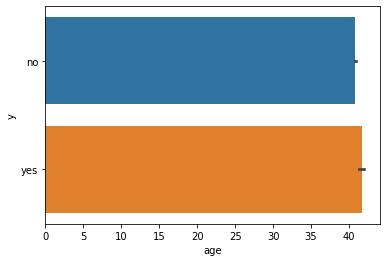

In [53]:
sns.barplot(x=data.age,y=data.y)

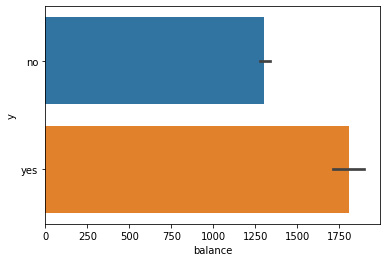

In [54]:
sns.barplot(data.balance,data.y)

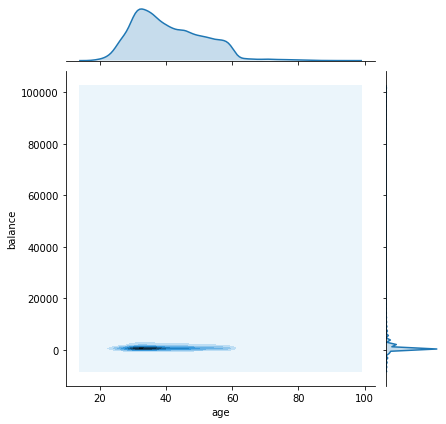

In [55]:
sns.jointplot(data.age,data.balance,kind='kde')

In [56]:
s1=data.sample(5000,random_state=1)

In [57]:
s2=data.sample(5000,random_state=2)

In [58]:
s3=data.sample(5000,random_state=3)

In [59]:
s4=data.sample(5000,random_state=4)

In [60]:
s5=data.sample(5000,random_state=5)

In [61]:
s6=data.sample(5000,random_state=6)

In [62]:
s7=data.sample(5000,random_state=7)

In [70]:
s8=data.sample(5000,random_state=8)

In [76]:
s9=data.sample(5000,random_state=9)

In [83]:
stat,p=shapiro(s1.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [84]:
stat,p=shapiro(s2.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [85]:
stat,p=shapiro(s3.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [87]:
stat,p=shapiro(s4.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [86]:
stat,p=shapiro(s5.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [88]:
stat,p=shapiro(s6.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [90]:
stat,p=shapiro(s7.balance)
print(p)
if p <= 0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [91]:
stat,p=shapiro(s8.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


In [92]:
stat,p=shapiro(s9.balance)
print(p)
if p<=0.05:
    print('Alternate Hypothesis (H1): R&D Spend is normally distributed')
else :
    print('Alternate Hypothesis (H1): R&D Spend is Not normally distributed')
print("Confidence Level : {} %".format(((1- p)*100)))

0.0
Alternate Hypothesis (H1): R&D Spend is normally distributed
Confidence Level : 100.0 %


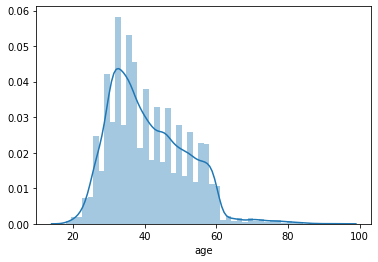

In [78]:
sns.distplot(data.age)

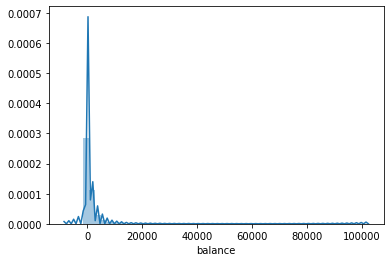

In [79]:
sns.distplot(data.balance)

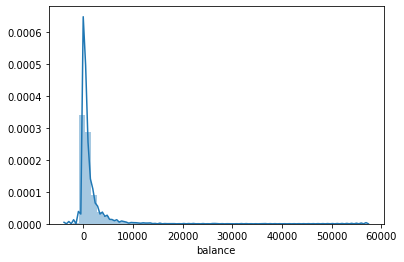

In [93]:
sns.distplot(s1.balance)

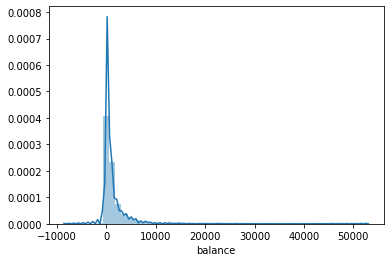

In [94]:
sns.distplot(s2.balance)

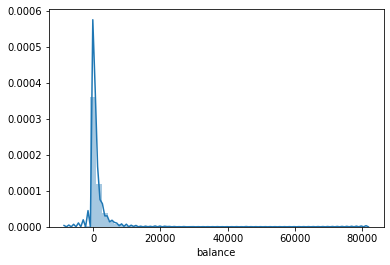

In [95]:
sns.distplot(s3.balance)

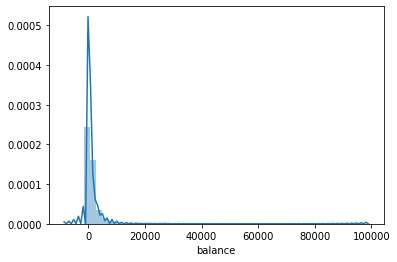

In [96]:
sns.distplot(s4.balance)

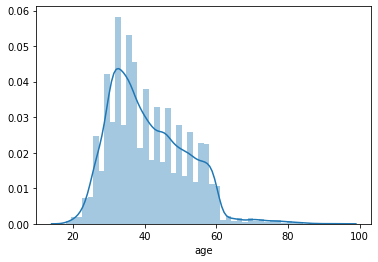

In [80]:
#Removed the outlier
data1=data[(~(data.age) > (Q3 + 1.5 * IQR)) | (~(data.age) < (Q1 - 1.5 * IQR))]
sns.distplot(data1.age)

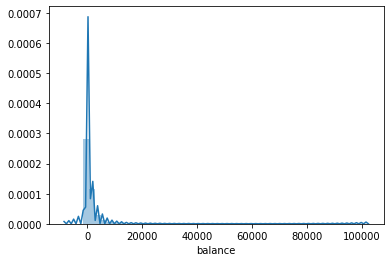

In [81]:
data2=data1[(~(data1.balance) > (Q3 + 1.5 * IQR)) | (~(data1.balance) < (Q1 - 1.5 * IQR))]
sns.distplot(data2.balance)

In [46]:
#Removed 588 outliers from Age and 
45211-44623

588